<a href="https://colab.research.google.com/github/annettembeyu/Hass_Consulting_Company_Sales_Forecast_/blob/master/Hass_Consulting_Company_Sales_Forecast_Moringa_DSC_Annette_Ngao_09_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hass Consulting Company Sales Forecast

# Defining the question

### a) Specifying the Data Analytic Question

  

*   What factors correlate with the house price mostly?
*   Which model  accurately predicts the sale of prices?

### b) Defining the Metric for Success

The analysis will be considered a success when:




*  the predictor variable that have the most effect on the housing prices are identified
*   the model that accurately predicts the sale of prices and its appropriateness in in solving the problem of predicting sales. The models that I will look into are:

                    1.   Multiple Linear Regression
                    2.   Quantile Regression
                    3.   Ridge Regression
                    4.   Lasso Regression
                    5.   Elastic Net Regression

### c) Understanding the context 

As a Data Scientist for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that been collected for the year 1970. 

Then create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### d) Recording the Experimental Design

*   Importing the necessary libraries and checking the data
*   External Data Source Validation
*   Exlporatory Data Analysis
*   Implementing the solution
*   Challenging the solution
*   Follow up questions






### e) Data Relevance

The dataset can be downloaded from [Link](http://bit.ly/IndependentProjectWeek7Dataset).

The data has 21613 rows and 20. The description of the attributes contained in the dataset is as follows:

*   Id 
*   price  - Price of the house
*   bedrooms - Number of Bedrooms
*   bathrooms - Number of Bathrooms
*   sqft_living - Square feet area of living area
*   sqft_lot  - Square feet area of parking Layout
*   floors - Number of Floors
*   waterfront - Whether waterfront is there or not
*   view - Number of Views
*   grade - Grades
*   sqft_above
*  sqft_basement - Square feet area off basement
*   yr_built - Year the house is built
*   yr_renovated - Year the house is renovated
*   zipcode - zipcode os the house
*   lat : Latitude of the house
*   lon : Longitude of the house
*   sqft_living15
*   sqft_lot15

The data is appropriate in answering the analytical questions as it has most of the house metrics.

## Importing the libraries and checking the Data

In [1]:
# Importing packages

import os
import pandas as pd
from pandas import DataFrame,Series
import matplotlib
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# loading the dataset
# previewing the first rows of the dataset
housing = pd.read_csv("Independent Project Week 7 - house_data.csv", parse_dates= ['yr_built', 'yr_renovated'])
housing.head()


id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [3]:
# preview the last rows of the dataset
housing.tail()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [4]:
# extracting the year from the year built in the rank dataframe
housing['year_built'] = pd.DatetimeIndex(housing['yr_built']).year
housing.head()

id     price  bedrooms  ...  sqft_living15  sqft_lot15  year_built
0  7129300520  221900.0         3  ...           1340        5650        1955
1  6414100192  538000.0         3  ...           1690        7639        1951
2  5631500400  180000.0         2  ...           2720        8062        1933
3  2487200875  604000.0         4  ...           1360        5000        1965
4  1954400510  510000.0         3  ...           1800        7503        1987

[5 rows x 21 columns]

In [5]:
# Checking the shape of the data
housing.shape

(21613, 21)

In [6]:
# checking whether the attributes have the appropriate datatype
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  datetime64[ns]
 14  yr_renovated   21613 non-null  object        
 15  zipcode        2161

In [7]:
# checking the columns heads
housing.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_built'],
      dtype='object')

In [8]:
# a preview of the statistical summaries for the numeric attributes
statnum= housing[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15', 'sqft_lot15']]
statnum.describe().round()

price  bedrooms  bathrooms  ...  sqft_basement  sqft_living15  sqft_lot15
count    21613.0   21613.0    21613.0  ...        21613.0        21613.0     21613.0
mean    540182.0       3.0        2.0  ...          292.0         1987.0     12768.0
std     367362.0       1.0        1.0  ...          443.0          685.0     27304.0
min      75000.0       0.0        0.0  ...            0.0          399.0       651.0
25%     321950.0       3.0        2.0  ...            0.0         1490.0      5100.0
50%     450000.0       3.0        2.0  ...            0.0         1840.0      7620.0
75%     645000.0       4.0        2.0  ...          560.0         2360.0     10083.0
max    7700000.0      33.0        8.0  ...         4820.0         6210.0    871200.0

[8 rows x 14 columns]

In [9]:
# Checking for missing values 
#
housing.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year_built       0
dtype: int64

In [10]:
# Checking for duplicates
housing.duplicated().any()

True

In [11]:
# Removing duplicates

housing.drop_duplicates(keep='first', inplace = True)

In [12]:
# Confirming whether the duplicates have been removed
#
housing.duplicated().any()

False

In [13]:
# Determining the no. of records in our dataset
#
housing.shape

(21610, 21)

In [14]:
# Checking the unique values 
#
housing.yr_built.unique()

array(['1955-01-01T00:00:00.000000000', '1951-01-01T00:00:00.000000000',
       '1933-01-01T00:00:00.000000000', '1965-01-01T00:00:00.000000000',
       '1987-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '1995-01-01T00:00:00.000000000', '1963-01-01T00:00:00.000000000',
       '1960-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '1942-01-01T00:00:00.000000000', '1927-01-01T00:00:00.000000000',
       '1977-01-01T00:00:00.000000000', '1900-01-01T00:00:00.000000000',
       '1979-01-01T00:00:00.000000000', '1994-01-01T00:00:00.000000000',
       '1916-01-01T00:00:00.000000000', '1921-01-01T00:00:00.000000000',
       '1969-01-01T00:00:00.000000000', '1947-01-01T00:00:00.000000000',
       '1968-01-01T00:00:00.000000000', '1985-01-01T00:00:00.000000000',
       '1941-01-01T00:00:00.000000000', '1915-01-01T00:00:00.000000000',
       '1909-01-01T00:00:00.000000000', '1948-01-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '1929-01-01

In [15]:
housing.yr_renovated.unique()

array(['0', '1991', '2002', '2010', '1999', '1992', '2013', '1994',
       '1978', '2005', '2008', '2003', '1984', '1954', '2014', '2011',
       '1974', '1983', '1945', '1990', '1988', '1957', '1977', '1981',
       '1995', '2000', '1998', '1970', '1989', '2004', '1986', '2009',
       '2007', '1987', '1973', '2006', '1985', '2001', '1980', '1971',
       '1979', '1997', '1950', '1969', '1948', '2015', '1968', '2012',
       '1963', '1951', '1993', '1962', '1996', '1972', '1953', '1955',
       '1982', '1956', '1940', '1976', '1946', '1975', '1958', '1964',
       '1959', '1960', '1967', '1965', '1934', '1944'], dtype=object)

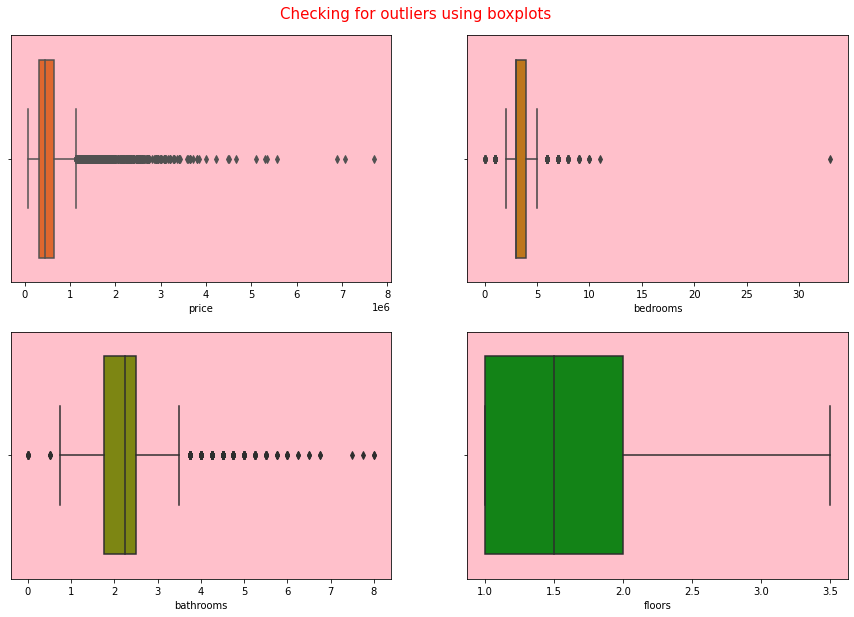

In [16]:
# to check for outliers


col_list = ['price', 'bedrooms', 'bathrooms', 'floors'  ]
colors = ['#FD5D10', '#D97900', '#8D9900', '#009606']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'red')
for ax, data, column, color in zip(axes.flatten(), housing, col_list, colors):
  sns.boxplot(housing[column], ax = ax, color = color)
  ax.set_facecolor('pink') 
  # Setting the background color to pink

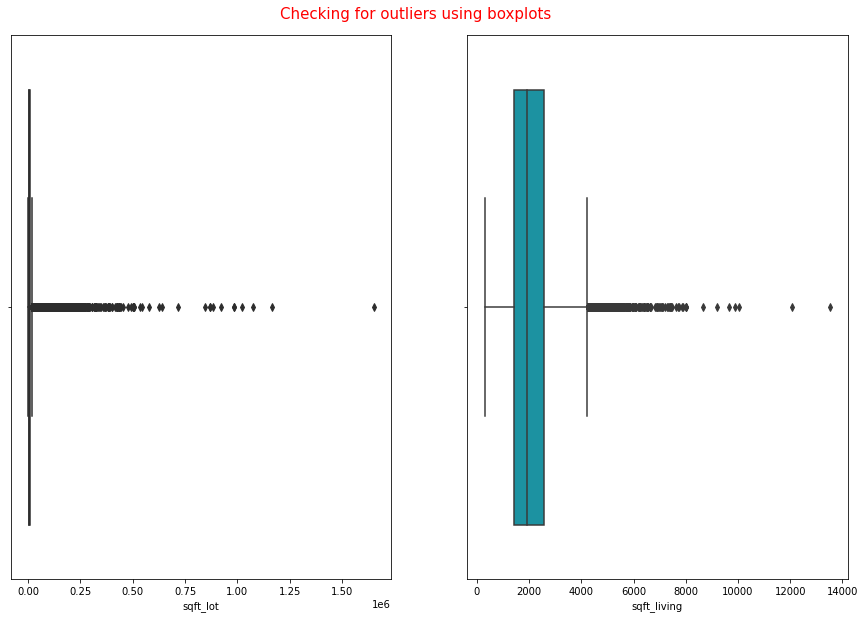

In [18]:
# to check for outliers


col_list1 = ['sqft_lot', 'sqft_living']
colors = ['#009688', '#06A3B7', '#0B9BE3', '#1770AB']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'red')
for ax, data, column, color in zip(axes.flatten(), housing, col_list1, colors):
  sns.boxplot(housing[column], ax = ax, color = color)
  ax.set_facecolor('white') 
  # Setting the background color to white

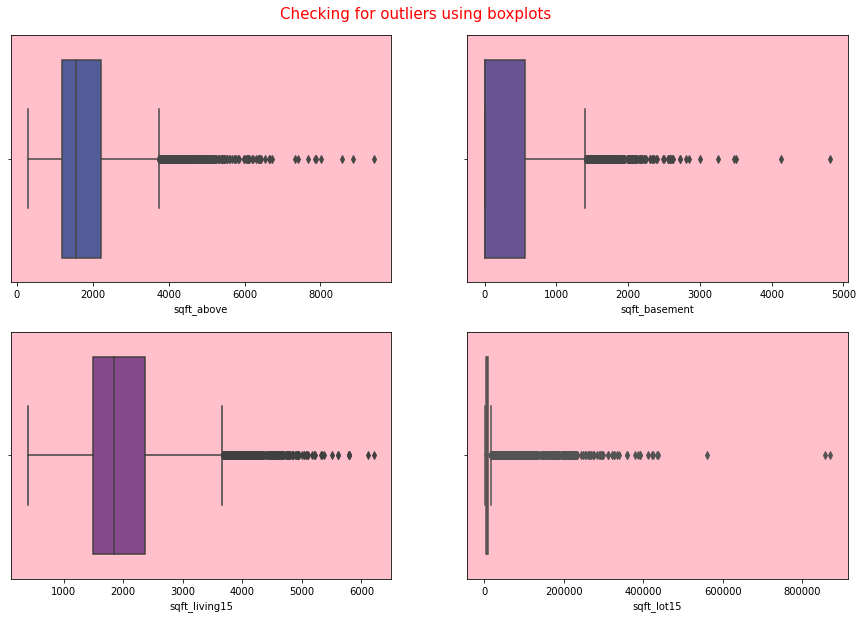

In [19]:
col_list2 = ['sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
colors = ['#4554A4', '#65499D', '#8F3E97', '#FF2717', '#BD3C14', '#E71F63']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'red')
for ax, data, column, color in zip(axes.flatten(), housing, col_list2, colors):
  sns.boxplot(housing[column], ax = ax, color = color)
  ax.set_facecolor('pink') 
  # Setting the background color to pink

## External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number.

 [Link](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv).

##  Exploratory Data Analysis

### Bivariate and Univariate analysis

In [20]:
# Descriptive summaries for the dataset
print('Variance of values in different columns')
print(statnum.var())
print('Skewness of values in different columns')
print(statnum.skew())
print('Kurtosis of values in different columns')
print(statnum.kurt())
print('Summary')
statnum.describe()

Variance of values in different columns
price            1.349550e+11
bedrooms         8.650150e-01
bathrooms        5.931513e-01
sqft_living      8.435337e+05
sqft_lot         1.715659e+09
floors           2.915880e-01
waterfront       7.485226e-03
view             5.872426e-01
condition        4.234665e-01
grade            1.381703e+00
sqft_above       6.857347e+05
sqft_basement    1.958727e+05
sqft_living15    4.697612e+05
sqft_lot15       7.455182e+08
dtype: float64
Skewness of values in different columns
price             4.021716
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64
Kurtosis of values in different columns
price             34.522444
bedrooms          49.063

price      bedrooms  ...  sqft_living15     sqft_lot15
count  2.161300e+04  21613.000000  ...   21613.000000   21613.000000
mean   5.401822e+05      3.370842  ...    1986.552492   12768.455652
std    3.673622e+05      0.930062  ...     685.391304   27304.179631
min    7.500000e+04      0.000000  ...     399.000000     651.000000
25%    3.219500e+05      3.000000  ...    1490.000000    5100.000000
50%    4.500000e+05      3.000000  ...    1840.000000    7620.000000
75%    6.450000e+05      4.000000  ...    2360.000000   10083.000000
max    7.700000e+06     33.000000  ...    6210.000000  871200.000000

[8 rows x 14 columns]

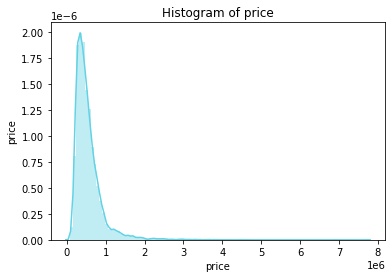

In [21]:
# checking the distribution of price
#
sns.distplot(housing['price'], bins= 100, hist=True, color = '#63D2E4')
plt.title('Histogram of price')
plt.ylabel('price')
plt.show()

<font color="green">*The distribution of the prices of houses is skewed*</font>

In [22]:
# count of the number of buildings in the different years
housing['year_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: year_built, Length: 116, dtype: int64

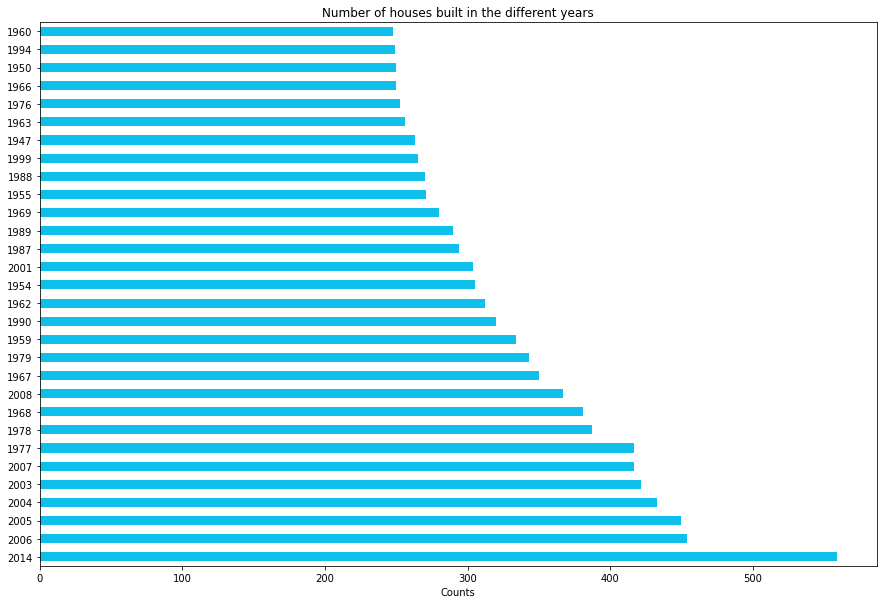

In [23]:
# the distribution of the building that were built in the different years
housing['year_built'].value_counts().head(30).plot(kind='barh', color='#0EBFE9', figsize=(15,10))
plt.xlabel('Counts')
plt.title('Number of houses built in the different years')
plt.show()

<font color="green">*2014 had many buildings being erected.</font>*

In [24]:
# getting the count of building with the different number of floors
housing['floors'].value_counts()

1.0    10680
2.0     8238
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

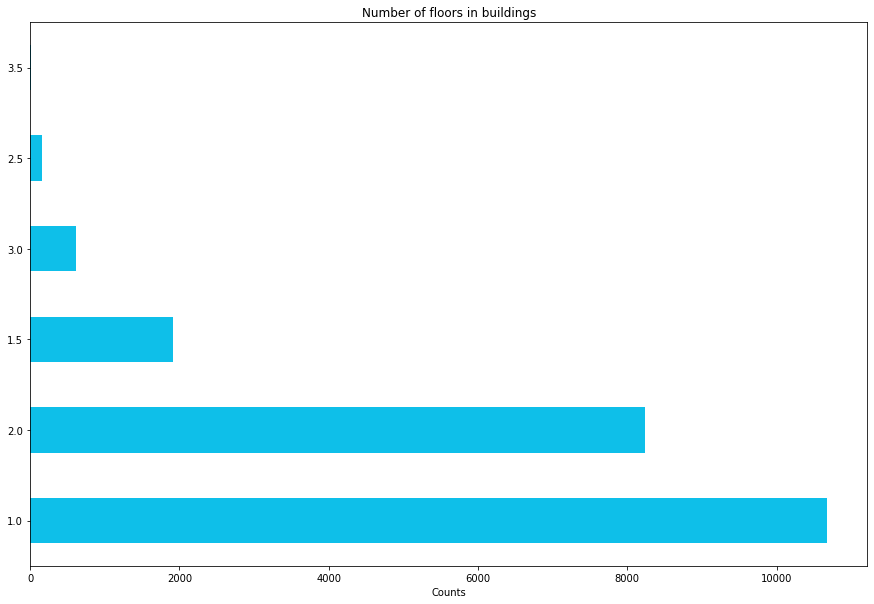

In [25]:
# the distribution of the number of floors in buildings
housing['floors'].value_counts().plot(kind='barh', color='#0EBFE9', figsize=(15,10))
plt.xlabel('Counts')
plt.title('Number of floors in buildings')
plt.show()

<font color="green">*Most buildings had one floor followed by those that had two floors.*</font>

In [26]:
housing.head()

id     price  bedrooms  ...  sqft_living15  sqft_lot15  year_built
0  7129300520  221900.0         3  ...           1340        5650        1955
1  6414100192  538000.0         3  ...           1690        7639        1951
2  5631500400  180000.0         2  ...           2720        8062        1933
3  2487200875  604000.0         4  ...           1360        5000        1965
4  1954400510  510000.0         3  ...           1800        7503        1987

[5 rows x 21 columns]

In [27]:
# No of bedrooms for the houses
housing.bedrooms.value_counts()

3     9822
4     6881
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

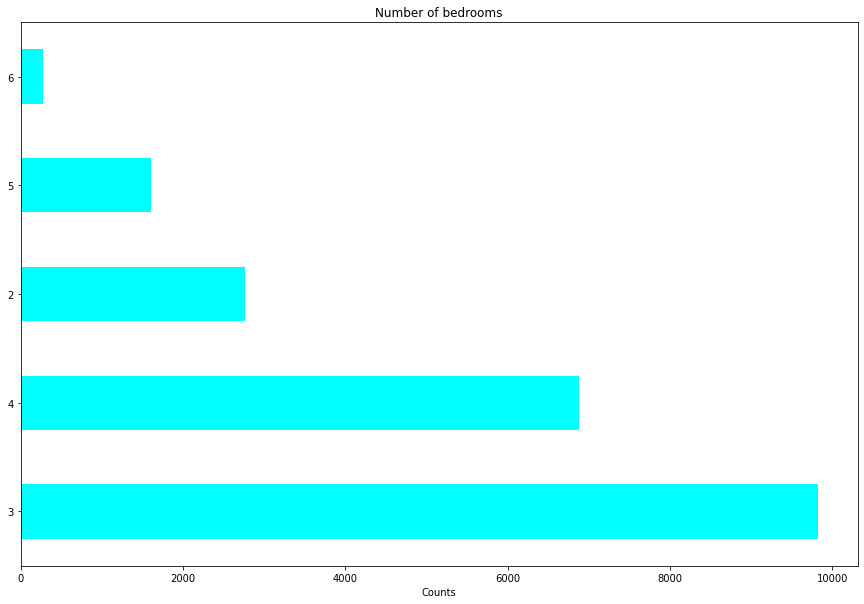

In [28]:
# the distribution of the number of bedrooms in the houses
housing['bedrooms'].value_counts().head().plot(kind='barh', color='cyan', figsize=(15,10))
plt.xlabel('Counts')
plt.title('Number of bedrooms')
plt.show()

<font color="green">*Most houses had three bedrooms then followed by those with four bedrooms*</font>

In [29]:
# rounding off number of bathrooms to whole numbers
housing['bathrooms']= housing['bathrooms'].round()

In [30]:
# count of buildings having the different number of bathrooms
housing.bathrooms.value_counts()

2.0    13848
1.0     3933
3.0     2527
4.0     1201
5.0       57
6.0       24
0.0       14
8.0        4
7.0        2
Name: bathrooms, dtype: int64

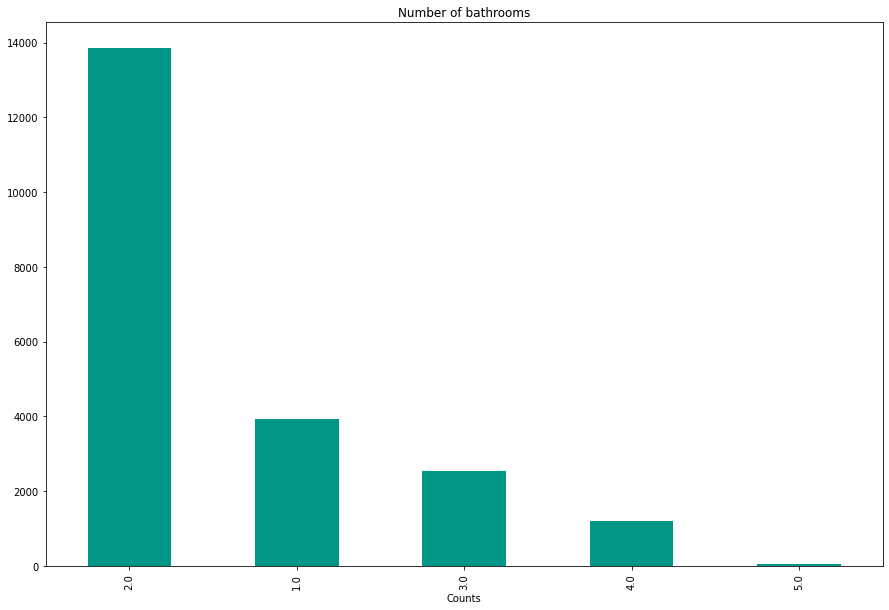

In [31]:
# the distribution of the number of bathrooms in the houses
housing['bathrooms'].value_counts().head().plot(kind='bar', color='#009688', figsize=(15,10))
plt.xlabel('Counts')
plt.title('Number of bathrooms')
plt.show()

<font color="green">*Most houses had 2 bathrooms<font>*

In [32]:
housing.yr_renovated.value_counts()

0       20697
2014       91
2013       37
2003       36
2007       35
        ...  
1944        1
1959        1
1954        1
1948        1
1934        1
Name: yr_renovated, Length: 70, dtype: int64

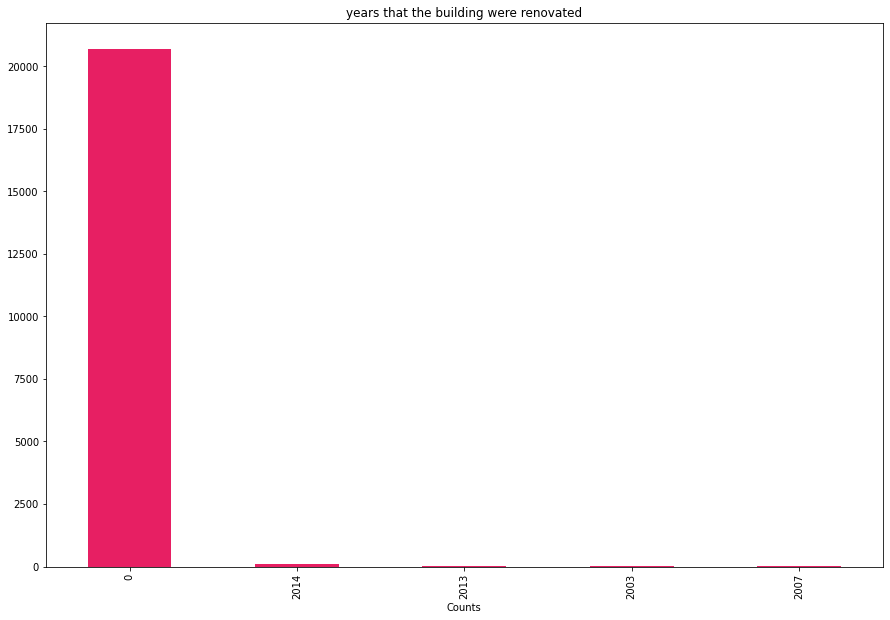

In [33]:
# the distribution of the number houses and the year that they were renovated
housing['yr_renovated'].value_counts().head().plot(kind='bar', color='#E71F63', figsize=(15,10))
plt.xlabel('Counts')
plt.title('years that the building were renovated')
plt.show()

<font color="green">*Most building had never been renovated.<font>*

In [34]:
# number of houses in the different zipcodes
housing.zipcode.value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

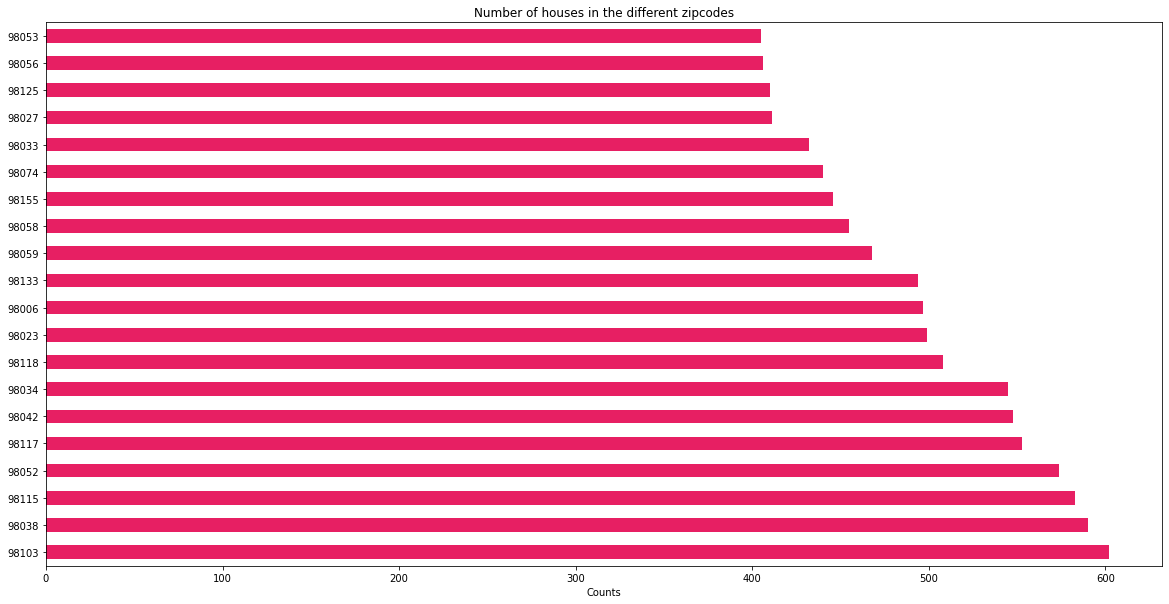

In [35]:
# the distribution of the number house in the different zipcodes
housing['zipcode'].value_counts().head(20).plot(kind='barh', color='#E71F63', figsize=(20,10))
plt.xlabel('Counts')
plt.title('Number of houses in the different zipcodes')
plt.show()

<font color="green">*Most houses were located at 98103<*font*>*

In [36]:
housing.sqft_living.value_counts()

1300    138
1400    135
1440    133
1010    129
1660    129
       ... 
3001      1
4970      1
2905      1
2793      1
1975      1
Name: sqft_living, Length: 1038, dtype: int64

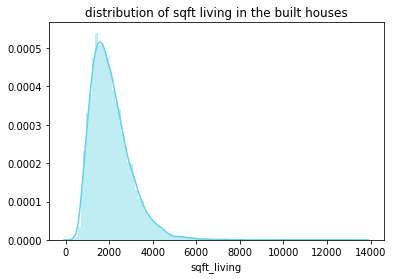

In [37]:
# checking the distribution of sqft_living
#
sns.distplot(housing['sqft_living'], bins= 100, hist=True, color = '#63D2E4')
plt.title('distribution of sqft living in the built houses')
plt.show()

<font color="green">*The distribution of the sqft living in the houses is skewed to the left.<font>*

In [38]:
# number of houses having the different sizes for the parking layout
housing.sqft_lot.value_counts()

5000     358
6000     290
4000     251
7200     220
4800     120
        ... 
17313      1
35752      1
937        1
9133       1
14321      1
Name: sqft_lot, Length: 9782, dtype: int64

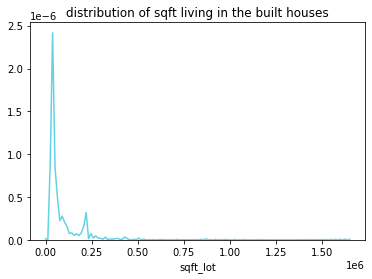

In [39]:
# checking the distribution of sqft_lot
#
sns.distplot(housing['sqft_lot'], hist=False, color = '#63D2E4')
plt.title('distribution of sqft living in the built houses')
plt.show()

In [40]:
# number of houses having waterfronts and those that did not have
housing.waterfront.value_counts()

0    21447
1      163
Name: waterfront, dtype: int64

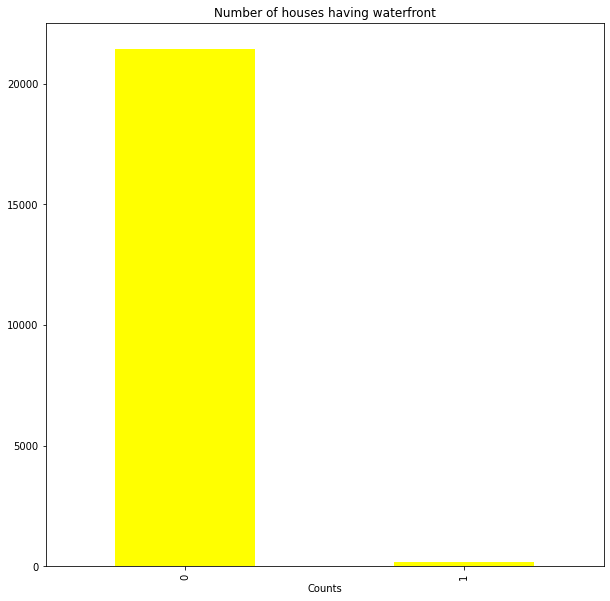

In [41]:
# the distribution of the number house in the different zipcodes
housing['waterfront'].value_counts().head(20).plot(kind='bar', color='yellow', figsize=(10,10))
plt.xlabel('Counts')
plt.title('Number of houses having waterfront')
plt.show()

<font color="green">*Most houses did not have waterfronts<font>*

In [43]:
housing.sqft_living15.value_counts()

1540    197
1440    195
1560    192
1500    181
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

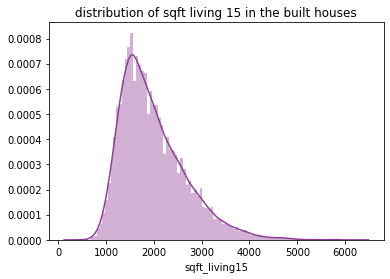

In [44]:
# checking the distribution of sqft_living15
#
sns.distplot(housing['sqft_living15'], bins= 100, hist=True, color = '#8F3E97')
plt.title('distribution of sqft living 15 in the built houses')
plt.show()

In [45]:
housing.sqft_lot15.value_counts()

5000      427
4000      357
6000      289
7200      211
4800      145
         ... 
8989        1
871200      1
809         1
4907        1
6147        1
Name: sqft_lot15, Length: 8689, dtype: int64

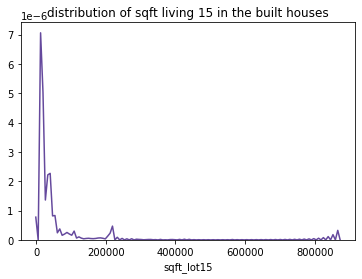

In [46]:
# checking the distribution of sqft_lot 15
#
sns.distplot(housing['sqft_lot15'], bins= 100, hist=False, color = '#65499D')
plt.title('distribution of sqft living 15 in the built houses')
plt.show()

In [47]:
# checking on the number of buildings having the different conditions
housing['condition'].value_counts()

3    14029
4     5678
5     1701
2      172
1       30
Name: condition, dtype: int64

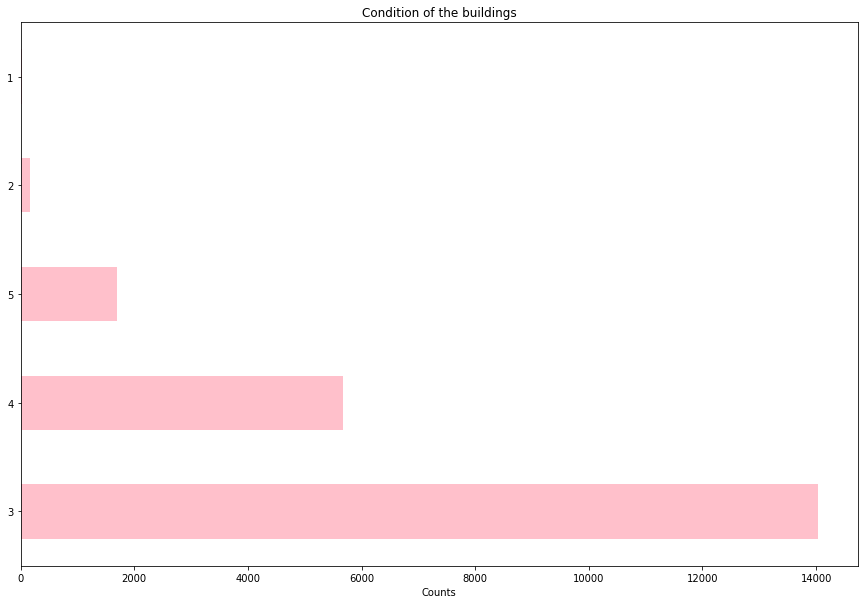

In [48]:
# the distribution of the condition of the buildings
housing['condition'].value_counts().plot(kind='barh', color='pink', figsize=(15,10))
plt.xlabel('Counts')
plt.title('Condition of the buildings')
plt.show()

<font color="green">*Most houses had condition 3*</font>

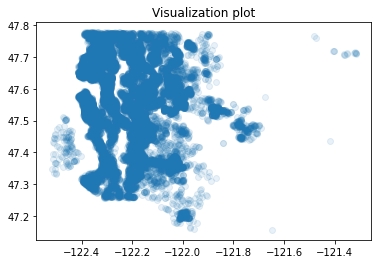

In [49]:
# geographic location of the areas where the houses are situated
plt.scatter(x=housing['long'], y=housing['lat'],alpha=0.1)
plt.title('Visualization plot')
plt.show()

In [51]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.9MB/s 
     |████████████████████████████████| 14.8MB 288kB/s 
     |████████████████████████████████| 10.9MB 36.7MB/s 


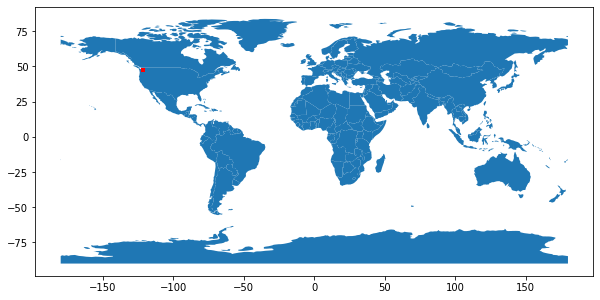

In [52]:
# geographic location of the houses
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(housing['long'], housing['lat'])]
gdf = GeoDataFrame(housing, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='.', color='red', markersize=15);

Text(0.5, 1.0, 'Price of houses against the year built')

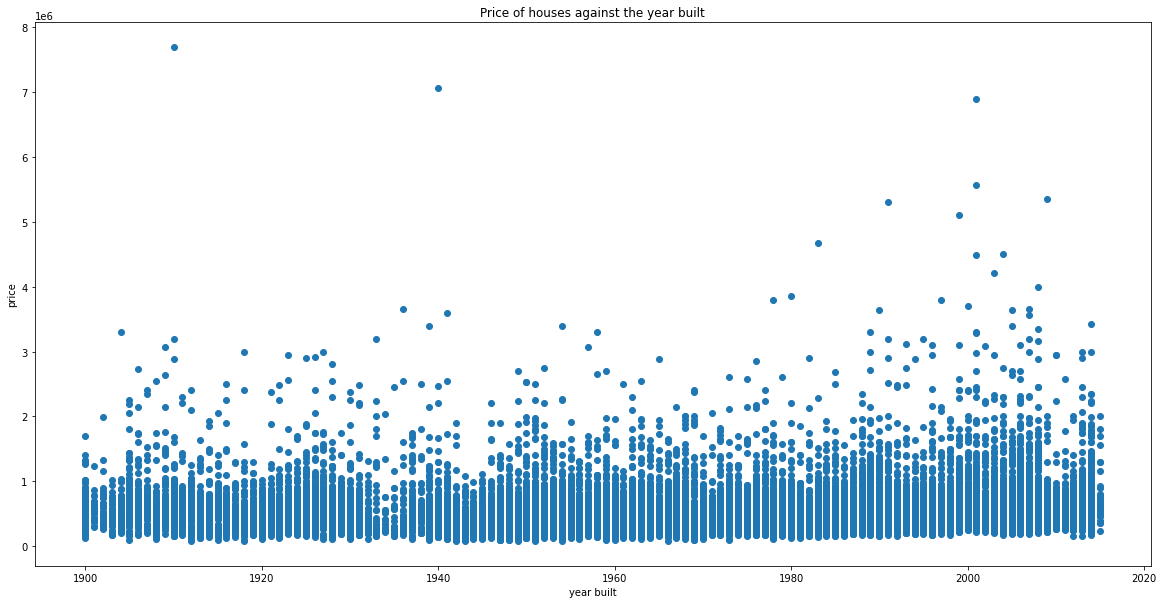

In [53]:
# looking at the price of the house in relation to when it was built
plt.figure(figsize=(20, 10))
plt.scatter(housing['year_built'], housing['price'])
plt.xlabel('year built')
plt.ylabel('price')
plt.title('Price of houses against the year built')

<font color="green">*The trend cannot be easily seen through the scatter plot above.<font>* 

### Does price increase over time?

Text(0.5, 1.0, 'yearly average House Price')

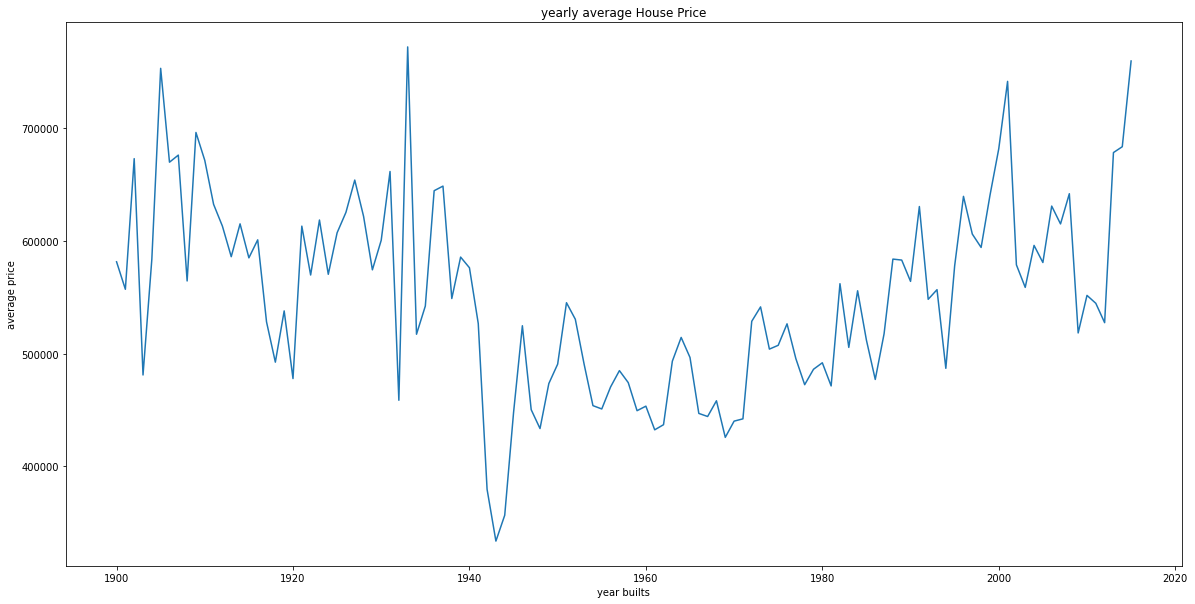

In [54]:
# checking whether the price for the house increases over time-the year that it was built
plt.figure(figsize=(20, 10))
plt.plot(housing.groupby('year_built').mean()['price'])
plt.xlabel('year builts')
plt.ylabel('average price')
plt.title('yearly average House Price')

<font color="green">There is a general increase in price of the houses over time-when the house was built. The trend is stochastic in nature

In [55]:
# extracting the year and month fro the year built column
housing['year_month'] = housing['yr_built'].dt.strftime('%Y-%m')

Text(0.5, 1.0, 'Monthly average House Price')

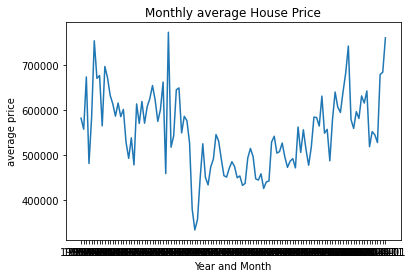

In [56]:
# plt.axis([-1, 13, 0, 600000])
plt.plot(housing.groupby('year_month').mean()['price'])
plt.xlabel('Year and Month')
plt.ylabel('average price')
plt.title('Monthly average House Price')

<font color="green">*There is a gradual increasing  trend in the pricing of the housing in relation to the time that it was built.The trend here is stochastic in nature not easil predictable<font>*

### Price against the number of bedrooms

Text(0.5, 1.0, 'Price of houses against the number of bedrooms')

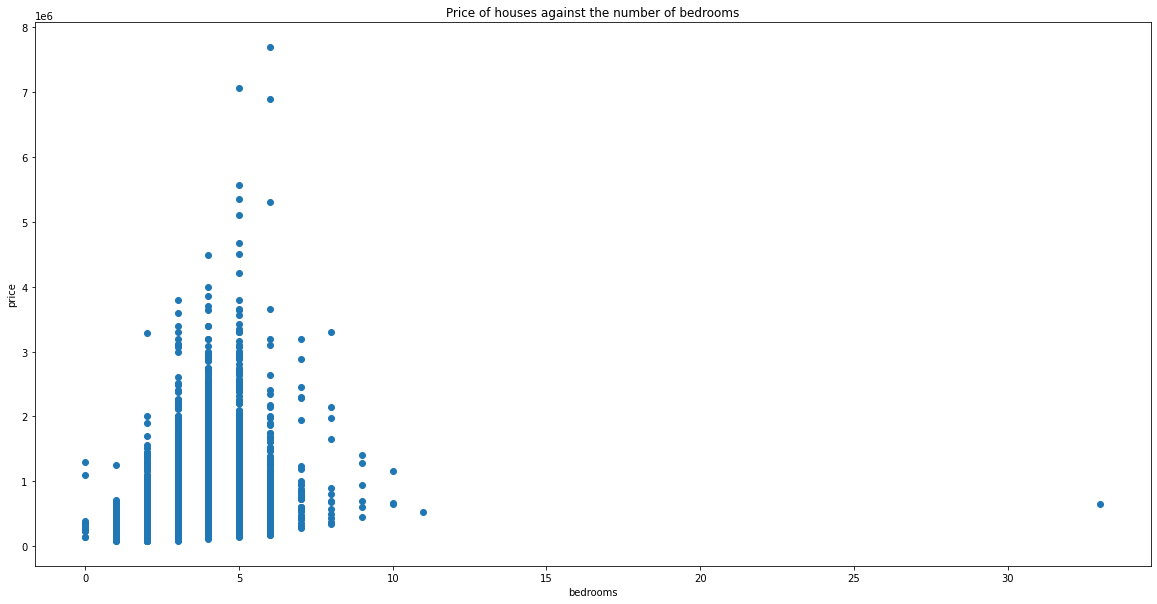

In [57]:
# scatterplot of the house price against number of bedrooms
plt.figure(figsize=(20, 10))
plt.scatter(housing['bedrooms'], housing['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Price of houses against the number of bedrooms')

In [58]:
# quantifying the strength of the relationship between the price of the house and the number of bedrooms
housing[['price','bedrooms']].corr()

price  bedrooms
price     1.000000  0.308346
bedrooms  0.308346  1.000000

<font color="green">*The relationship between the price of the house and the number of bedrooms is positive but the are not strongly correlated.<font>*

Text(0.5, 1.0, 'Price of houses against the number of bathrooms')

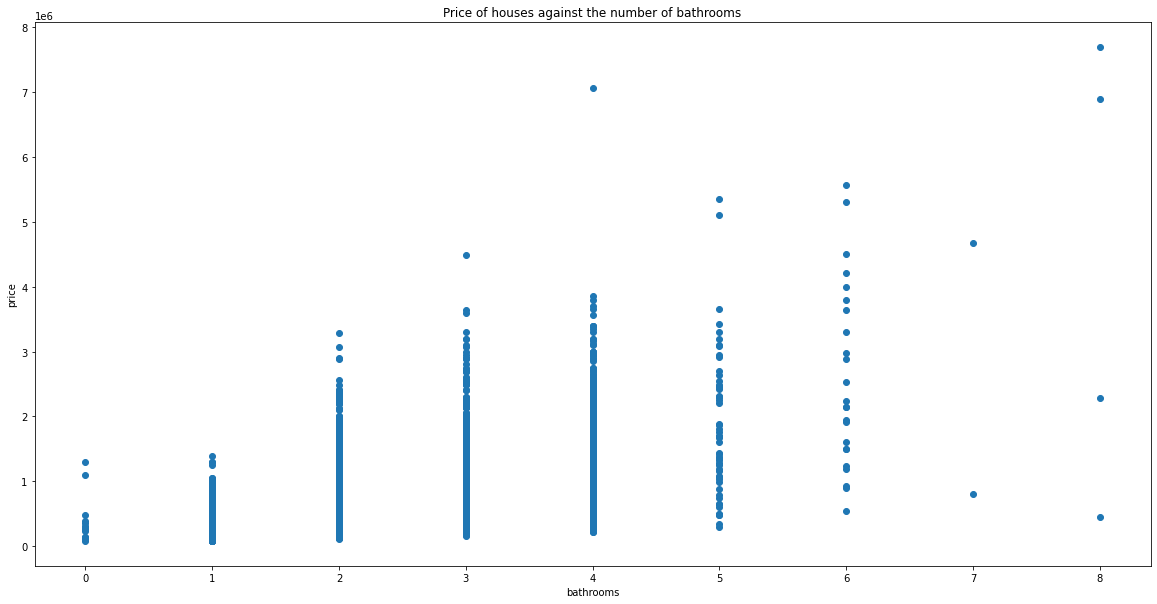

In [59]:
# scatterplot of the house price against number of bathrooms
plt.figure(figsize=(20, 10))
plt.scatter(housing['bathrooms'], housing['price'])
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('Price of houses against the number of bathrooms')

In [60]:
# quantifying the strength of the relationship between the price of the house and the number of bedrooms
housing[['price','bathrooms']].corr()

price  bathrooms
price      1.000000   0.518931
bathrooms  0.518931   1.000000

<font color="green">*The relationship between the price of the house and the number of bathrooms is positive and moderately strong.<font>*

### Price of the house vs square lot

In [61]:
# adding a column price per lot
housing['price_per_lot'] = housing['price'] / housing['sqft_lot']

Text(0.5, 1.0, 'Distribution of Price per Plot')

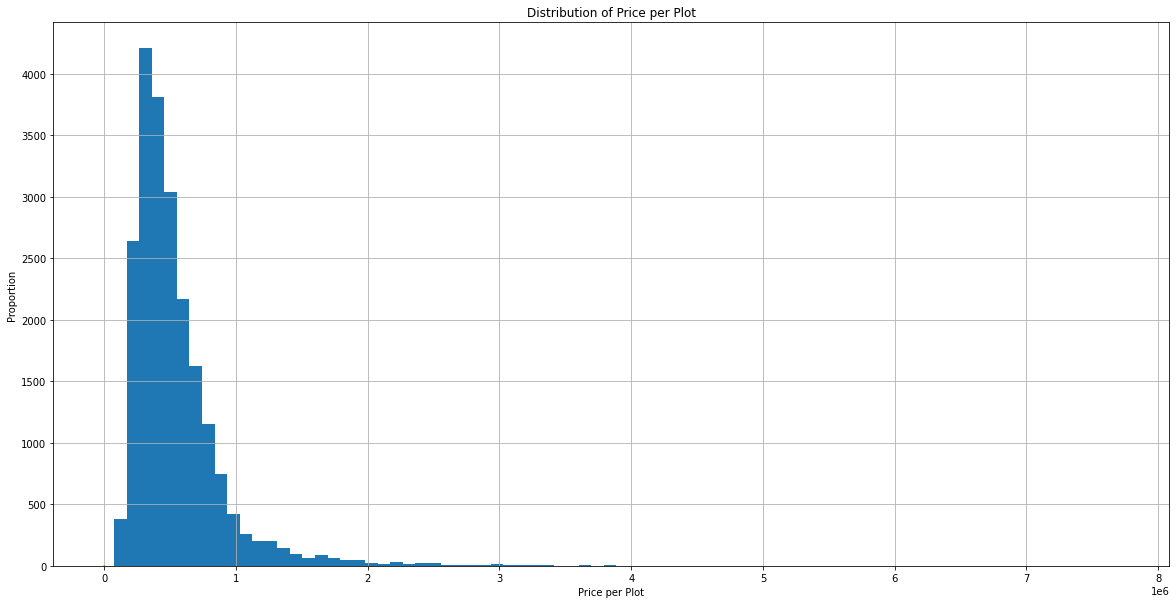

In [62]:
# visual of the distribution of price per plot of the parking lot
plt.figure(figsize=(20, 10))
housing.price.hist(bins=80)
sns.distplot(housing['price_per_lot'])

plt.xlabel('Price per Plot')
plt.ylabel('Proportion')
plt.title('Distribution of Price per Plot')

### Price vs Number of floors

In [63]:
housing['floors']= housing['floors'].round()

Text(0.5, 1.0, 'Price of houses against the number of bathrooms')

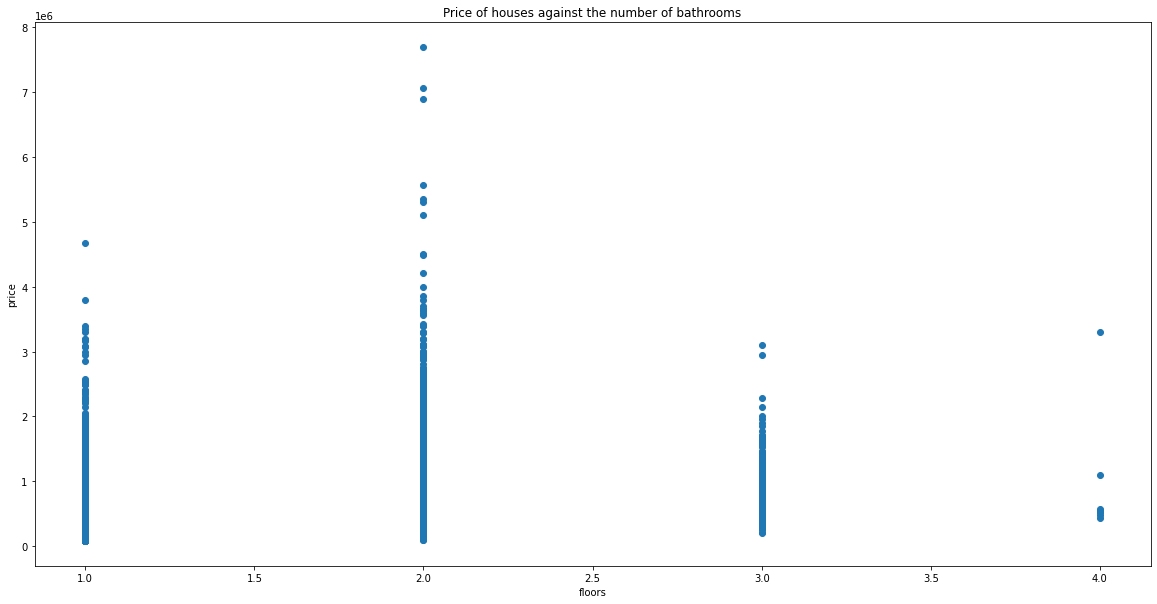

In [64]:
# scatterplot of the house price against number of bedrooms
plt.figure(figsize=(20, 10))
plt.scatter(housing['floors'], housing['price'])
plt.xlabel('floors')
plt.ylabel('price')
plt.title('Price of houses against the number of bathrooms')

<font color="green">*It is not evident from the plot whether an increase in the number of floor increases the price of the house.Further analysis woud cocnlusively ascertain the effect on price<font>*

In [66]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21610 non-null  int64         
 1   price          21610 non-null  float64       
 2   bedrooms       21610 non-null  int64         
 3   bathrooms      21610 non-null  float64       
 4   sqft_living    21610 non-null  int64         
 5   sqft_lot       21610 non-null  int64         
 6   floors         21610 non-null  float64       
 7   waterfront     21610 non-null  int64         
 8   view           21610 non-null  int64         
 9   condition      21610 non-null  int64         
 10  grade          21610 non-null  int64         
 11  sqft_above     21610 non-null  int64         
 12  sqft_basement  21610 non-null  int64         
 13  yr_built       21610 non-null  datetime64[ns]
 14  yr_renovated   21610 non-null  object        
 15  zipcode        2161

In [67]:
housing.year_month = pd.to_datetime(housing.year_month)

Text(0.5, 1.0, 'Monthly average House Price')

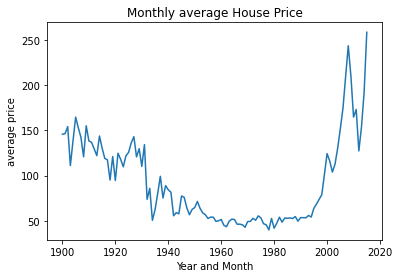

In [68]:
plt.plot(housing.groupby('year_month').mean()['price_per_lot'])
plt.xlabel('Year and Month')
plt.ylabel('average price')
plt.title('Monthly average House Price')

<font color="green">*The price per lot  changed irregularly over time. With a decline between 1940 to 1995<font>*

In [69]:
# Dropping irrelevant columns
sales_df= housing.drop(columns=['sqft_living15', 'sqft_lot15', 'id'],axis=1)

In [70]:
sales_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'year_built', 'geometry', 'year_month', 'price_per_lot'],
      dtype='object')

### What factors correlate with the house price mostly?

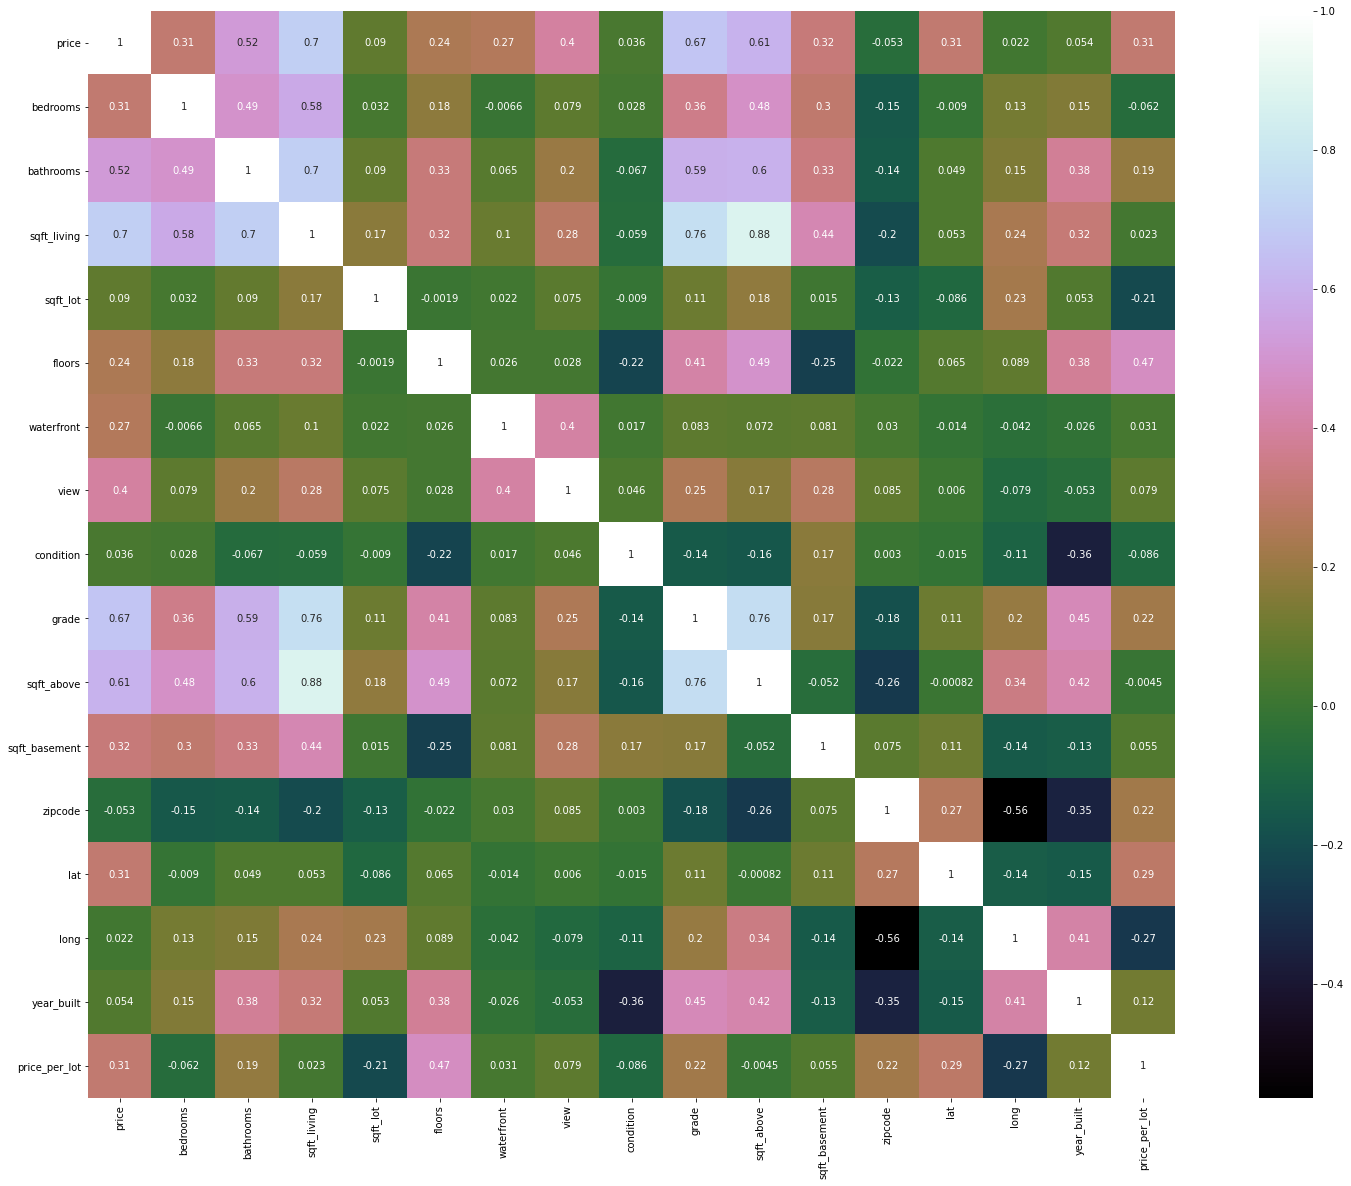

In [71]:
# GETTING Correllation matrix
corr_mat=sales_df.corr(method='pearson')
plt.figure(figsize=(30,20))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

<font color="green">There is multicollinearity in the data evdient from some of the feature attributes being correlated with the other.

In [72]:
#get the correlation of each feature with the target variable
corr = pd.DataFrame(sales_df.corr()['price'])
#get the absolute value of the correlation
corr['abs'] = np.abs(corr['price'])
#sorting the values by their absolute value, in descending order
corr = corr.sort_values(by='abs',ascending=False)
corr
#

price       abs
price          1.000000  1.000000
sqft_living    0.702046  0.702046
grade          0.667478  0.667478
sqft_above     0.605569  0.605569
bathrooms      0.518931  0.518931
view           0.397466  0.397466
sqft_basement  0.323849  0.323849
bedrooms       0.308346  0.308346
price_per_lot  0.308082  0.308082
lat            0.306922  0.306922
waterfront     0.266332  0.266332
floors         0.244890  0.244890
sqft_lot       0.089658  0.089658
year_built     0.053980  0.053980
zipcode       -0.053162  0.053162
condition      0.036397  0.036397
long           0.021567  0.021567

<font color="green">The sqft living, grade, sqft above and number of bathrooms in the house are the most highly correlated to the price of the house.

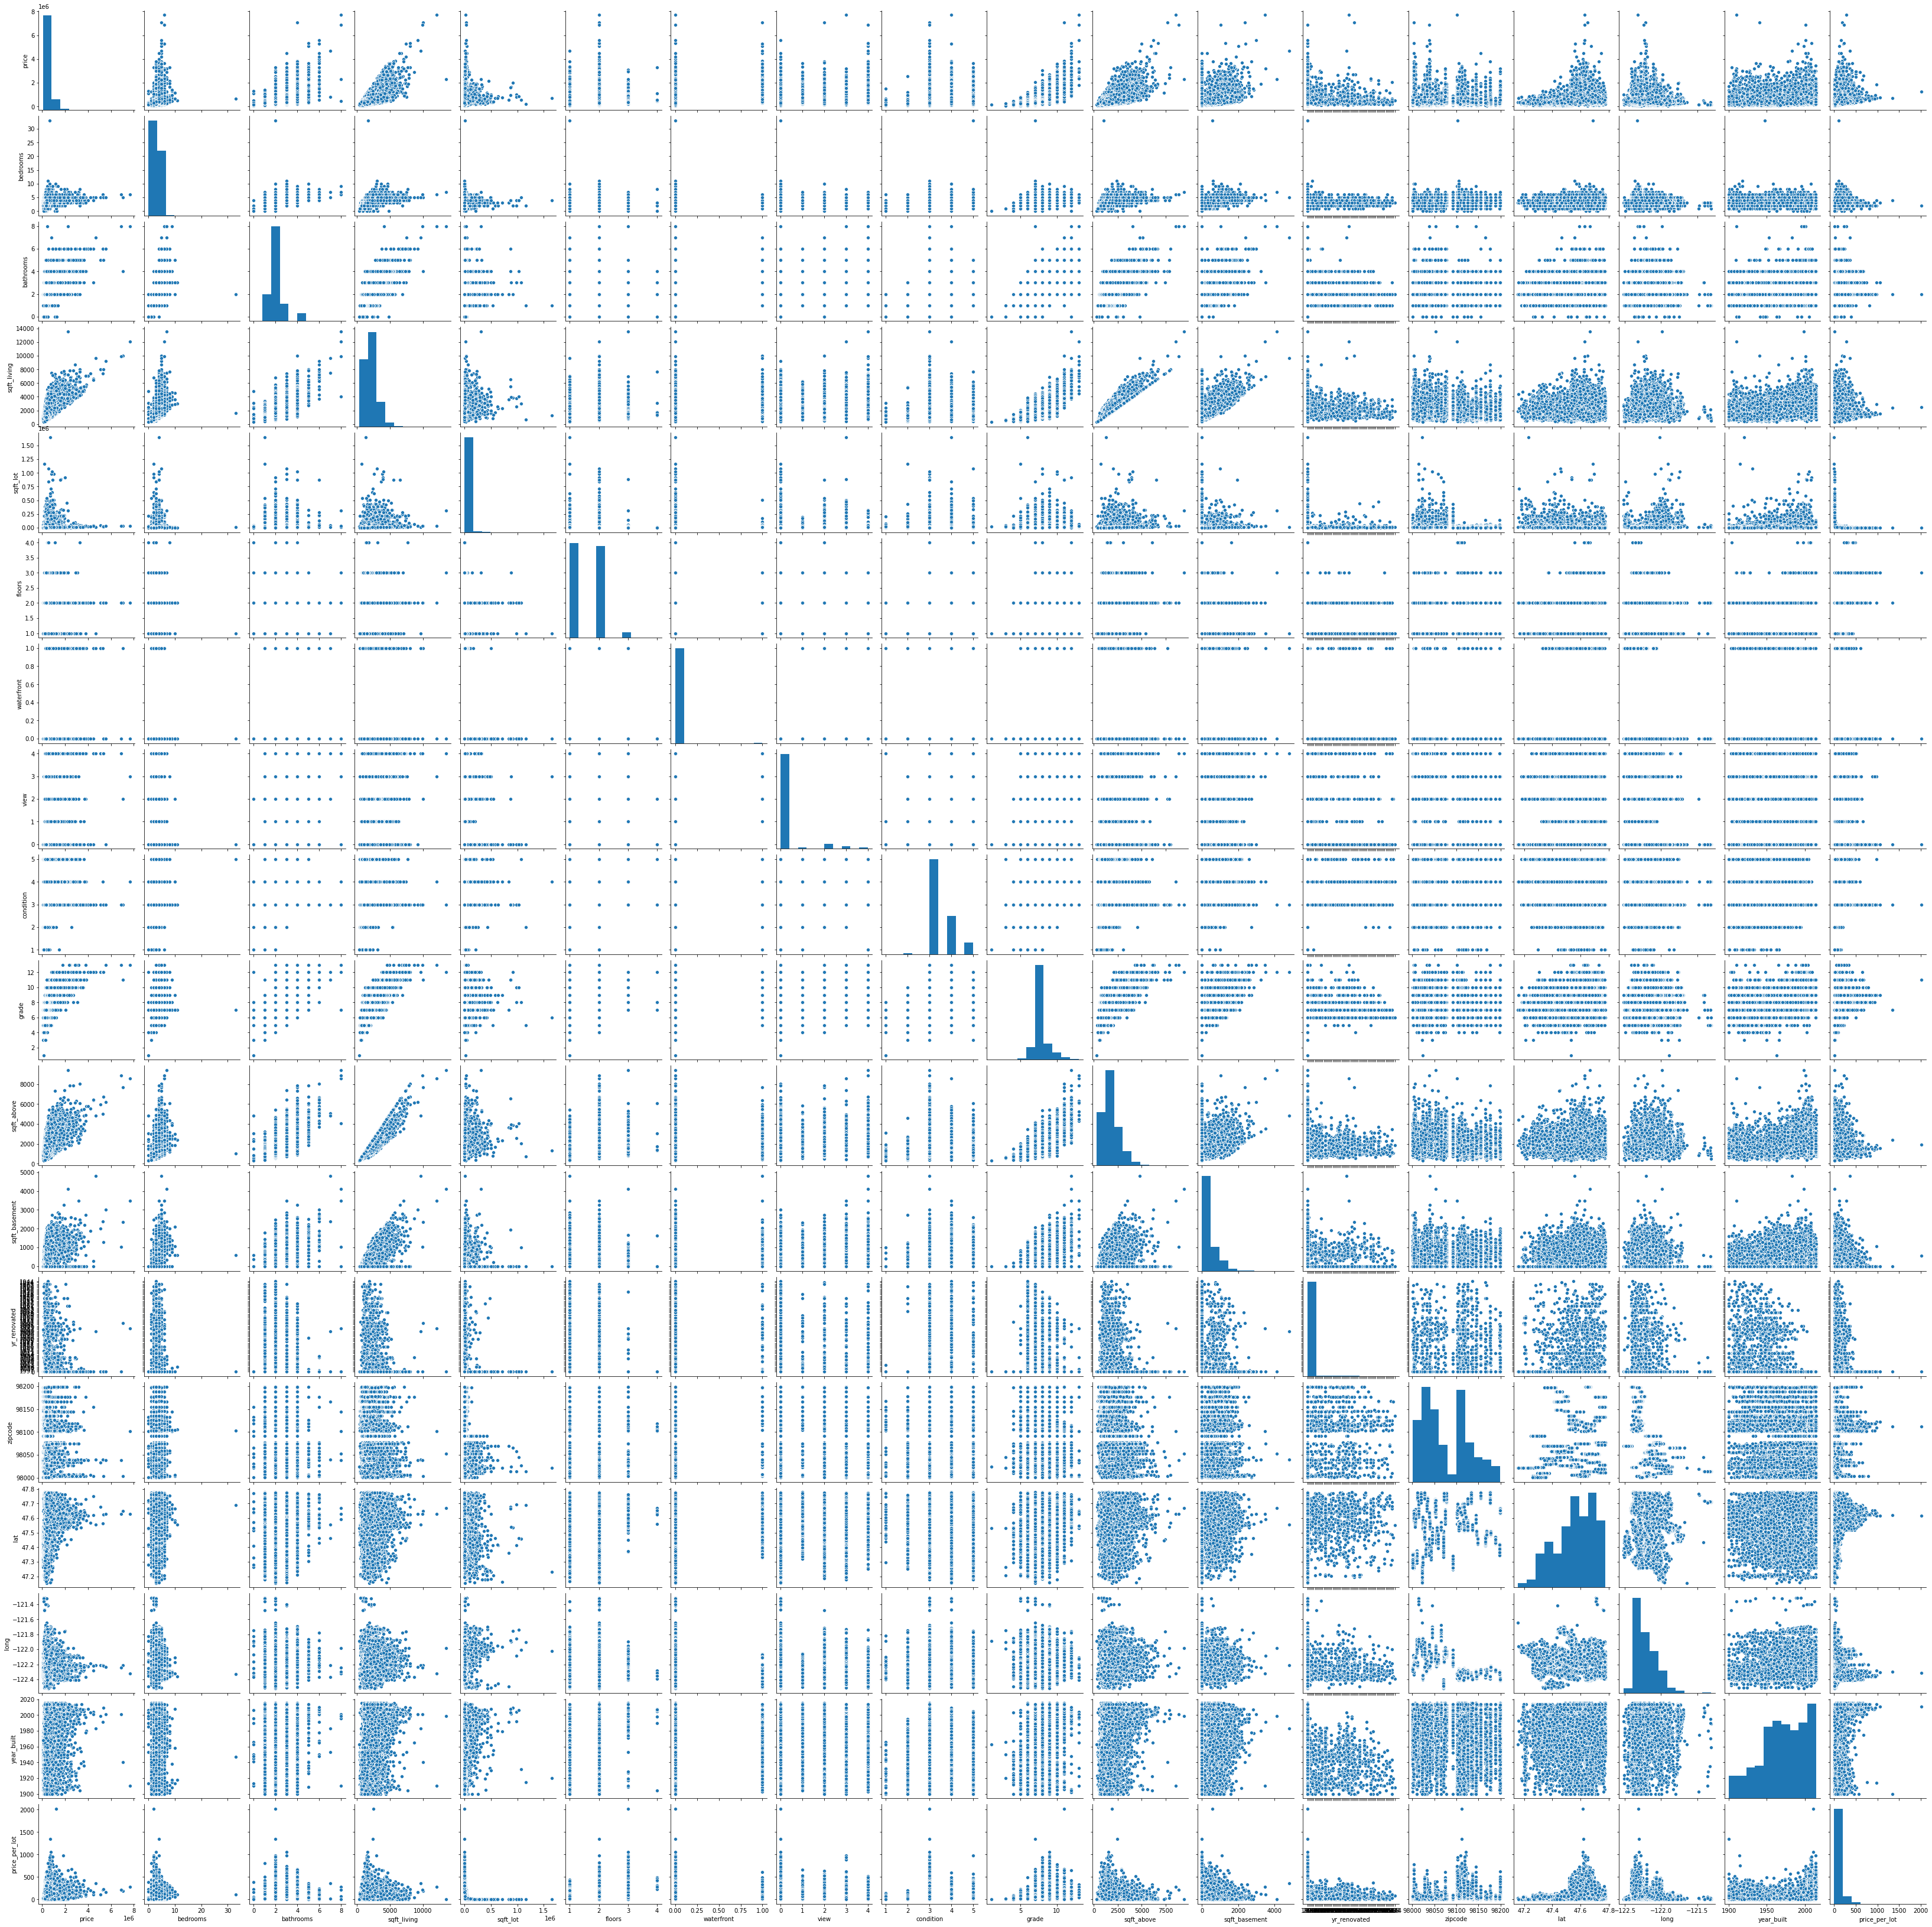

In [ ]:
sns.pairplot(sales_df)

In [73]:
# Installing factor analyzer 
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
# using the observed correlation matrix against the identity matrix. 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(sales_df)
chi_square_value, p_value

(798503.1578351157, 0.0)

<font color="green">*The p-value is 0 which implies that the test was statistically significant hence proceed for to do factor analysis.<font>*

In [74]:
# isolating the dependent varible for factor analysis
Factor1 =sales_df[['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'sqft_basement', 'bedrooms', 'floors']]
Factor1.head()

sqft_living  grade  sqft_above  bathrooms  sqft_basement  bedrooms  floors
0         1180      7        1180        1.0              0         3     1.0
1         2570      7        2170        2.0            400         3     2.0
2          770      6         770        1.0              0         2     1.0
3         1960      7        1050        3.0            910         4     1.0
4         1680      8        1680        2.0              0         3     1.0

In [75]:
# correlation matrix which one can see variables that are highly correlated
corr_mat = Factor1.corr()
corr_mat

sqft_living     grade  ...  bedrooms    floors
sqft_living       1.000000  0.762719  ...  0.576674  0.321987
grade             0.762719  1.000000  ...  0.357003  0.407642
sqft_above        0.876600  0.755919  ...  0.477619  0.488397
bathrooms         0.701789  0.591296  ...  0.489617  0.326491
sqft_basement     0.435054  0.168443  ...  0.303077 -0.245631
bedrooms          0.576674  0.357003  ...  1.000000  0.177795
floors            0.321987  0.407642  ...  0.177795  1.000000

[7 rows x 7 columns]

In [76]:
# calculate the eigen values to decide the number of factors that will correctly
# group the features on the level of their similarity 
eigen_values = np.linalg.eigvals(corr_mat)
eigen_values_cumvar = (eigen_values/7).cumsum()
eigen_values_cumvar

array([0.54405969, 0.74486717, 0.74486717, 0.77980029, 0.83371679,
       0.92372941, 1.        ])

<font color="green">*From the output above, the four factors explain approximately 79% of the variance.The number of factors will be equal to 4 in our case.<font>*

In [78]:
# using factor analyzer to carry out factor analysis
# using rotation equal to varimax to get maximum variance and the method deployed for factor analysis is being maximum likelihood.
from factor_analyzer import FactorAnalyzer
Factor_Analysis = FactorAnalyzer()
Factor_Analysis.analyze(Factor1,n_factors=4,rotation='varimax',method='ml')

In [79]:
# computing factor loadings
loadings = Factor_Analysis.loadings
loadings

Factor1   Factor2   Factor3   Factor4
sqft_living    0.825893  0.306819  0.208208  0.421733
grade          0.688005  0.109809  0.393770  0.186480
sqft_above     0.870380 -0.178323  0.276888  0.361884
bathrooms      0.458238  0.261321  0.392432  0.382965
sqft_basement  0.085376  0.970385 -0.085998  0.198084
bedrooms       0.336325  0.190868  0.128789  0.505882
floors         0.313051 -0.264932  0.452240  0.120283

<font color="green">*Selecting variables for each of these groups to decrease the features and the chances of multicollinearity. The four features are sqft_above, sqft_basement, floors and bedrooms.<font>*

In [80]:
# computing the proportional variance and cumulative variance of the 4-factor solution.
Factor_Analysis.get_factor_variance()

Factor1   Factor2   Factor3   Factor4
SS Loadings     2.341398  1.254549  0.657578  0.799878
Proportion Var  0.334485  0.179221  0.093940  0.114268
Cumulative Var  0.334485  0.513707  0.607647  0.721915

##  Implementing the Solution

### Linear Regression

In [81]:
# picking the features that were considered during factor analysis
X = sales_df[['sqft_above', 'sqft_basement', 'floors', 'bedrooms']].values
y = sales_df['price'].values

# Train using 80% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
#Getting regression coefficients
regressor.coef_

array([   298.88548373,    344.87838173,  27971.4612036 , -59091.27571184])

<font color="green">An increase in one unit of price results to an increase in round figure of:

* 299 units of sqft above
* 345 units of sqft basement
* 29971 units of floor

<font color="green">An increase in one unit of price results to an decrease in round figure of 59091 units for bedroom


In [83]:
sales_df.head()

price  bedrooms  ...  year_month  price_per_lot
0  221900.0         3  ...  1955-01-01      39.274336
1  538000.0         3  ...  1951-01-01      74.288870
2  180000.0         2  ...  1933-01-01      18.000000
3  604000.0         4  ...  1965-01-01     120.800000
4  510000.0         3  ...  1987-01-01      63.118812

[5 rows x 21 columns]

In [84]:
y_pred = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

Actual     Predicted
count  4.322000e+03  4.322000e+03
mean   5.434344e+05  5.363039e+05
std    3.625612e+05  2.565115e+05
min    8.100000e+04  8.507555e+04
25%    3.230000e+05  3.530007e+05
50%    4.500000e+05  4.855821e+05
75%    6.500000e+05  6.661136e+05
max    4.000000e+06  2.083244e+06

<font color="green">A sneak peek at the actual and predicted values shows that our model is not so accurate in making predictions.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

<font color="green">using the RMSE to compare models to each other. The lower the value the better.

<font color="green">These values are relative to our dependent variable, i.e our dependent variable ranges from 8.100000e+04 to 4.000000e+06, with a mean of 5.434344e+05 and standard deviation of 3.625612e+05. This makes an RMSE of 250648.14788879312 not acceptable as it s too large. This implies that the model does not accurately predict the response.

<font color="green">In conclusion this model is not performing well in terms of making predictions.

In [87]:
# getting the coefficient of determination
regressor = LinearRegression()  
model= regressor.fit(X_train, y_train)
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5055766853130768


<font color="green">The independent variables in this model can explain 50% of the dependent variable.Which is fair.

### Quantile regression

In [88]:
# importing the necessary libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.quantile_regression as Q_reg

In [90]:
# carrying outthe OLS to find out the score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
OLS = LinearRegression()
OLS.fit(X_train, y_train)

# model evaluation for testing set
y_test_predict = OLS.predict(X_test)
r2 = metrics.r2_score(y_test, y_test_predict).round(2)
print('R2 score is {}'.format(r2) )

R2 score is 0.52


<font color="green">This shows that our linear regression did not do a good job due to the low variance obtained

In [101]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=0,min_samples_split=10)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [102]:
# Get the predictions of all trees for all observations
# Each observation has N predictions from the N trees
pred_Q = pd.DataFrame()
for pred in rf.estimators_:
    temp = pd.Series(pred.predict(X_test).round(2))
    pred_Q = pd.concat([pred_Q,temp],axis=1)
pred_Q.head()

0          0          0  ...          0          0          0
0  363000.00  380093.75  353111.11  ...  344250.00  402933.33  353900.00
1  427236.84  463816.67  370033.33  ...  396245.00  406583.33  620843.75
2  581682.50  404729.41  647038.89  ...  612236.36  625689.29  555234.38
3  527703.08  580424.38  534217.37  ...  494780.62  465297.00  428764.00
4  341686.36  363159.87  502180.77  ...  382674.70  301050.00  364899.87

[5 rows x 200 columns]

In [104]:
RF_actual_pred = pd.DataFrame()

for q in quantiles:
    s = pred_Q.quantile(q=q, axis=1)
    RF_actual_pred = pd.concat([RF_actual_pred,s],axis=1,sort=False)
   
RF_actual_pred.columns=quantiles
RF_actual_pred['actual'] = y_test
RF_actual_pred['interval'] = RF_actual_pred[np.max(quantiles)] - RF_actual_pred[np.min(quantiles)]
RF_actual_pred = RF_actual_pred.sort_values('interval')
RF_actual_pred = RF_actual_pred.round(2)
RF_actual_pred

0.01        0.05         0.5  ...        0.99     actual    interval
1230   150592.02   159213.80   178711.50  ...   203131.33   151100.0    52539.31
3331   150592.02   159213.80   178711.50  ...   203131.33   105000.0    52539.31
68     243020.26   246403.53   265747.45  ...   297150.42   153000.0    54130.16
2648   243020.26   246403.53   265747.45  ...   297150.42   222400.0    54130.16
3892   243020.26   246403.53   265747.45  ...   297150.42   250000.0    54130.16
...          ...         ...         ...  ...         ...        ...         ...
423   1140000.00  1396447.92  2328636.37  ...  5098828.57  1950000.0  3958828.57
3798   970000.00  1389071.43  3031388.89  ...  5300000.00  1110000.0  4330000.00
2267  1246077.50  1515541.66  2542272.72  ...  5973895.24  2700000.0  4727817.74
281   1039300.00  1435629.55  3167000.00  ...  5894466.66  4670000.0  4855166.66
131   1627433.34  1922050.00  3038333.34  ...  7277600.00  6890000.0  5650166.66

[4322 rows x 7 columns]

In [105]:
r2 = metrics.r2_score(RF_actual_pred['actual'], RF_actual_pred[0.5]).round(2)
print('R2 score is {}'.format(r2) )

R2 score is 0.51


<font color="green">The quantile regression still produces a low variance just like the linear modelling. With a score of 51% it is did not perform well.

### Ridge regression

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [109]:
# Data Preparation
# 
#
# Setting up our X and y datasets
#
X = sales_df[['sqft_above', 'sqft_basement', 'floors', 'bedrooms']]
y = sales_df['price']

In [110]:
# Creating the baseline regression model
# This is a model that has no regularization to it
#
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

66278512881.736176


<font color="green">This output will give an indication as to whether  the regularized ridge regression model is superior or not.

In [111]:
# determining the most appropriate value for the l2 regularization-the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# first creating the ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# taking the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [112]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# 

66478697518.00984

In [116]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
model1 = ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

66295014602.162285


<font color="green">The comparisons between the MSE for the base model and the ridge model shows that there is little comparison between the two. The ridge regression modle is not supperior to the baseline.

In [117]:
r_sq = model1.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5088071738233603


<font color="green">The ridge regression has obtained a slightly lower variance compare to the base model which also had a COD of approximately 51%.Ridge regression introduce a small amount of bias into the estimates
to reduce the variance that multicollinearity inflates.For this case it did not perform well.

**Lasso Regression**

In [123]:
# Before building the models, let's first scale data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.
# 

# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes
#
X = sales_df[['sqft_above', 'sqft_basement', 'floors', 'bedrooms']]
y = sales_df['price']

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [124]:
# building the Lasso model. 
# Then train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# 
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.5089294382612486
lasso MSE: 66278512889.87504
lasso coef: [248795.39413846 152203.15916317  15519.71273915 -54436.91203043]


In [125]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.5107633683257242
linear score: 0.5107576278814145
lasso MSE: 66532272732.05136
linear MSE: 66533053386.609276
lasso best estimator coef: [248412.2088425  154595.55158584  15822.91861136 -56061.82898702]
linear coef: [248457.74212993 154648.72656009  15849.14005043 -56127.21623793]


<font color="green">The Lasso model will not perform any better than the base model having a low variance similar to that obtained by the base model.

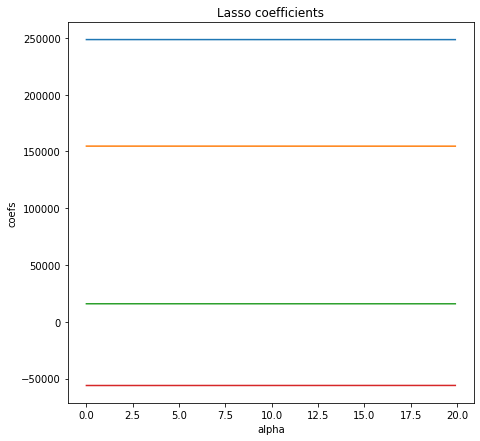

In [126]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

### Elastic Net

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [130]:
# selecting the fetaure and target variables
X = sales_df[['sqft_above', 'sqft_basement', 'floors', 'bedrooms']]
y = sales_df['price']


In [131]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

# This mean standard error score is our benchmark for determining 
# if the elastic net model will be better or worst. 

66278512881.736176


In [132]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bedrooms': -58531.76959104177,
 'floors': 27978.53913759711,
 'sqft_above': 300.43647575485505,
 'sqft_basement': 343.89979262846964}

In [133]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data; set inside the ElasticNet function. 
# Then create a grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [134]:
# fitting themodel and displaying the best parameters and the best results 
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)
print(search.best_params_)
print(abs(search.best_score_))
66278512881.736176

{'alpha': 1e-05, 'l1_ratio': 0.8}
66668935270.439186


In [135]:
# setting the hyperparameters to the recommended values and run on the data.
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

113198600960.39528


<font color="green">Looking at the score obtained by the ealstic net regression, which is slightly higher that the base model. The results imply that the Elasticnet regression will perform better than the baseline model.

In [136]:
# Below are the coefficients
 # Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
print(coef_dict_baseline)
 
#Coeff from elastic net.
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
print(coef_dict_baseline)

# There is a big difference between the  coefficients. 
# There is no attribute whose coefficient was reduced to zero in this case
# 


{'sqft_above': 300.43647575485505, 'sqft_basement': 343.89979262846964, 'floors': 27978.53913759711, 'bedrooms': -58531.76959104177}
{'sqft_above': 39.78637935995827, 'sqft_basement': 42.118694383843774, 'floors': 21387.103656628242, 'bedrooms': 15077.391330708666}


 Challenging the solution

The very large values in the coefficients for the variable are as a result of the different units of  measurement for the attributes could probably explain the big disparity.

For this case the baseline model proved to perform better than the other models.

The dataset does not sufficiently give a picture of what exactly affects the prices of houses this is evident from how the models are performing

## Follow up questions

It would be interesting to find out whether there are other factors that affect the price for the houses beside these given in the dataset.

Assuming that the output given for the different models was accurate most of 

*   The models actually had a variance of approximately 0.51 which is slow. This implies that probably there are other factors that actualy affect the price.
*   It is highly recommended that futher research is done on the factors affecting prices for houses which are not only the house feature/condition but also other factor like economical.
* Important environmental conditions such as access to social amenities also affect the prices of houses as well as infrastructure. This could probably explain why the variance were still low even after introducing biases through ridge, lasso and elastic net regression

**A major follow up question would be: How do the prices of houses compare from one location to another and what are the prevailing living conidtions(such as access to social amenities and social infrastructure)?**

